In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

In [2]:
original_data=pd.read_csv("dataset/AAPL.csv")

In [3]:
original_data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/12/1980,0.128348,0.128906,0.128348,0.128348,0.099874,469033600
1,12/15/1980,0.122210,0.122210,0.121652,0.121652,0.094663,175884800


In [4]:
#Taking 'Volume' column for testing benford law
data=original_data['Volume']
data.head()

0    469033600
1    175884800
2    105728000
3     86441600
4     73449600
Name: Volume, dtype: int64

In [5]:
data.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10579 entries, 0 to 10578
Series name: Volume
Non-Null Count  Dtype
--------------  -----
10579 non-null  int64
dtypes: int64(1)
memory usage: 82.8 KB


There are 10579 instances

In [6]:
#Storing 1st digits of all volume value
leading_digit_list=[]
for i in list(data):
    leading_digit_list.append(str(i)[0])


In [7]:
leading_digit_list[0:5]

['4', '1', '1', '8', '7']

In [8]:
set(leading_digit_list)

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

Since the first digit cannot be zero, so removing it.

In [9]:
while '0' in leading_digit_list:
    leading_digit_list.remove('0')

In [10]:
len(leading_digit_list)

10578

In [11]:
leading_digit_list.sort()

In [12]:
set(leading_digit_list)

{'1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [13]:
frequency={}
for i in leading_digit_list:
    if i in frequency.keys():
        frequency[i]+=1
    else:
        frequency[i]=1

In [14]:
frequency.values

<function dict.values>

In [15]:
frequency

{'1': 3639,
 '2': 1929,
 '3': 1227,
 '4': 858,
 '5': 615,
 '6': 570,
 '7': 603,
 '8': 603,
 '9': 534}

In [16]:
for i in frequency:
    frequency[i]=frequency[i]/len(leading_digit_list)*100

In [17]:
frequency

{'1': 34.401588201928526,
 '2': 18.235961429381735,
 '3': 11.59954622802042,
 '4': 8.111174134997164,
 '5': 5.813953488372093,
 '6': 5.388542257515598,
 '7': 5.700510493477028,
 '8': 5.700510493477028,
 '9': 5.048213272830402}

# Visualization

In [18]:
benford_data = pd.DataFrame({"Leading Digit": ['1', '2', '3', '4', '5', '6', '7', '8', '9'], "Proportion": [30.1, 17.6, 12.5, 09.7, 07.9, 06.7, 05.8, 05.1, 04.6]})
benford_data


,Leading Digit,Proportion
0,1,30.1
1,2,17.6
2,3,12.5
3,4,9.7
4,5,7.9
5,6,6.7
6,7,5.8
7,8,5.1
8,9,4.6


In [21]:
new_df=pd.DataFrame({"Leading Digit": ['1', '2', '3', '4', '5', '6', '7', '8', '9'],"Proportion":[0.301, 0.176,  0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046]})

<BarContainer object of 9 artists>

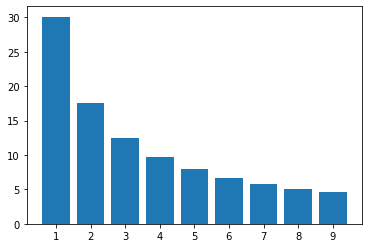

In [22]:
plt.bar(benford_data['Leading Digit'],benford_data['Proportion'])

In [23]:
mydata=pd.DataFrame(frequency.items(),columns=['Leading Digit','Proportion'])
mydata

,Leading Digit,Proportion
0,1,34.401588
1,2,18.235961
2,3,11.599546
3,4,8.111174
4,5,5.813953
5,6,5.388542
6,7,5.700510
7,8,5.700510
8,9,5.048213


<BarContainer object of 9 artists>

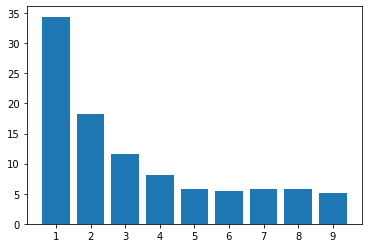

In [24]:
plt.bar(mydata['Leading Digit'],mydata['Proportion'])

In [25]:
xpos=np.arange(1,len(mydata['Leading Digit'])+1)
xpos

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

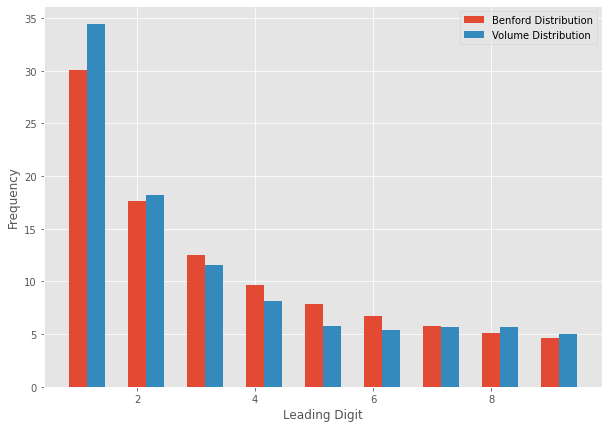

In [26]:
style.use('ggplot')
plt.figure(figsize=(10,7))
barwidth=0.3
plt.bar(xpos,benford_data['Proportion'],width=barwidth,label='Benford Distribution')
plt.bar(xpos+0.3,mydata['Proportion'],width=barwidth,label='Volume Distribution')
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.legend()

Here we can see that 'Volumme' of Apple does somewhat follows Benford's law from the above graph 